<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/fin/Cifar10/add_dense/cnn_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.2849 - loss: 1.9044
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5070 - loss: 1.3579
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5696 - loss: 1.1986
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6083 - loss: 1.1040
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6305 - loss: 1.0398
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6435 - loss: 1.0017
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6593 - loss: 0.9601
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6694 - loss: 0.9344
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6763 - loss: 0.9083
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6891 - loss: 0.8844


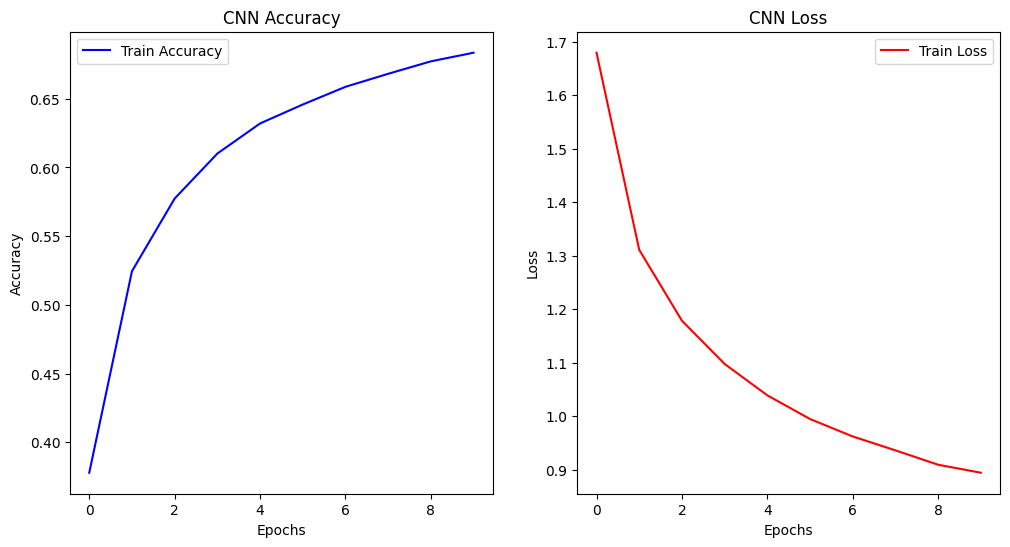

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Features Shape: (50000, 256)
Test Features Shape: (10000, 256)
KNN Accuracy: 0.7199


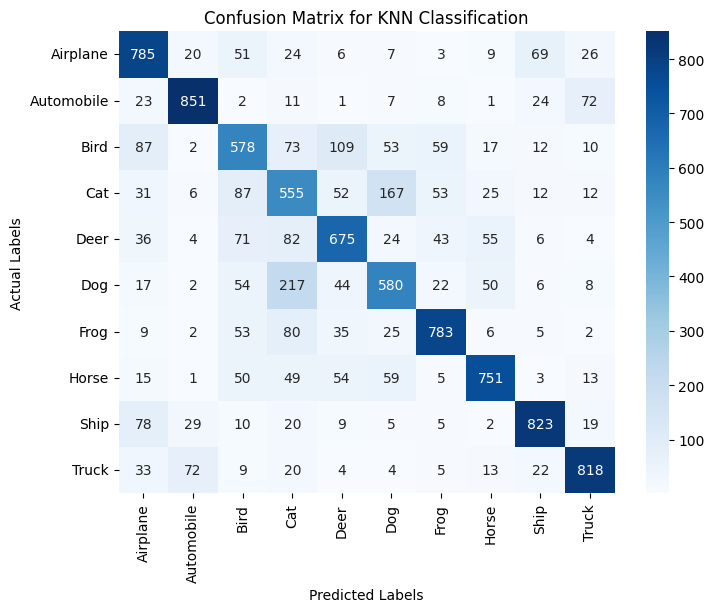

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from tensorflow.keras.layers import Flatten

class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# CIFAR-10 데이터 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# 데이터 정규화
train_images, test_images = X_train / 255.0, X_test / 255.0

# 원핫 인코딩
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=len(class_names))
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=len(class_names))

# CNN 모델 정의
cnn_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(len(class_names), activation='softmax')  # Class output layer
])

# CNN 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN 모델 학습
history = cnn_model.fit(train_images, y_train_onehot, epochs=10)

# CNN 정확도, 손실 그래프
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

# CNN 특성 추출
cnn_feature_extractor = Sequential(cnn_model.layers[:-1])  # Output layer 제외
X_train_features = cnn_feature_extractor.predict(train_images)
X_test_features = cnn_feature_extractor.predict(test_images)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_features, y_train.flatten())  # 원핫 인코딩 제거 -> 정수형 라벨 사용

# KNN 예측 및 평가
y_pred = knn.predict(X_test_features)
knn_accuracy = accuracy_score(y_test.flatten(), y_pred)
print("KNN Accuracy:", knn_accuracy)

# 혼동 행렬 생성
conf_mat = confusion_matrix(y_test.flatten(), y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for KNN Classification')
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd drive
%cd MyDrive
%cd 인기초
%ls

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/인기초
[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/인기초
[Errno 2] No such file or directory: '인기초'
/content/drive/MyDrive/인기초
flowers-dataset/
